# HW 2: Apply Linear Regression to Construct a Prostate Cancer Model & Digits Data Model

Blanca Miller
<br>
STAT 760
<br>
02/06/2018

Prostrate Data Info: http://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.info.txt 
<br>
Data Set: http://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data

Given a training set of prostate cancer linear data, estimate the model parameters using subset selection. 

## STEPS
1. import data
2. break data into two groups: train and test
3. break the training set into two matrices
    - X : design matrix (add column of 1s at beginning)
    - y : vector of responses
4. convert the X and y data frames into numpy arrays
5. standardize the predictors to have unit variance
6. estimate weights
7. calculate RSS for training set for all possible models
8. Graph k by RSS


## FUNCTIONS
- Fxn evaluates RSS for given X, y, beta
- Fxn trains models given list of columns
- Fxn generates all possible list of columns
- Fxn plot dictionary

## Imports

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv('prostate.data', delimiter='\t')

In [3]:
print(data[0:10])

   Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
0           1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6   
1           2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6   
2           3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7   
3           4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6   
4           5  0.751416  3.432373   62 -1.386294    0 -1.386294        6   
5           6 -1.049822  3.228826   50 -1.386294    0 -1.386294        6   
6           7  0.737164  3.473518   64  0.615186    0 -1.386294        6   
7           8  0.693147  3.539509   58  1.536867    0 -1.386294        6   
8           9 -0.776529  3.539509   47 -1.386294    0 -1.386294        6   
9          10  0.223144  3.244544   63 -1.386294    0 -1.386294        6   

   pgg45      lpsa train  
0      0 -0.430783     T  
1      0 -0.162519     T  
2     20 -0.162519     T  
3      0 -0.162519     T  
4      0  0.371564     T  
5

## Functions

In [4]:
#evaluates RSS for given X, y, beta
def evaluateRSS(df, predictor_subset, beta):
    
    # generate predictor df
    predictor_df = df[predictor_subset]
    
    # generate response df
    response_df = df["lpsa"]
    
    # convert predictor df to ndarray
    predictor_matrix = predictor_df.as_matrix()
    
    # normalize predictors
    predictor_matrix = (predictor_matrix - np.mean(predictor_matrix, axis=0))/np.std(predictor_matrix, axis=0)

    # adds constant term 1s to predictor matrix
    predictor_matrix = np.c_[np.ones(len(predictor_matrix)), predictor_matrix]
    
    # convert response df to ndarray
    response_matrix = response_df.as_matrix()
    
    # compute error
    e = response_matrix - np.dot(predictor_matrix, beta)
    
    # return error
    return np.dot(e,e)

In [5]:
# train model given a list of columns
def train(df, predictors_subset):
    
    # generate predictor df
    predictor_df = df[predictors_subset]
    
    # generate response df
    response_df = df["lpsa"]
    
    # convert predictor df to ndarray
    predictor_matrix = predictor_df.as_matrix()
    
    # normalize predictors
    predictor_matrix = (predictor_matrix - np.mean(predictor_matrix, axis=0))/np.std(predictor_matrix, axis=0)

    # adds constant term 1s to predictor matrix
    predictor_matrix = np.c_[np.ones(len(predictor_matrix)), predictor_matrix]
    
    # convert response df to ndarray
    response_matrix = response_df.as_matrix()
    
    # fit model by pinv:
    # calculate psuedo-inverse
    predictor_inverse = np.linalg.pinv(predictor_matrix)
    
    # multiply pseudo-inverse by response matrix
    beta = np.dot(predictor_inverse, response_matrix)
    
    # return weights
    return beta

In [6]:
# generates all possible list of columns for each subset
def generate_columns(predictors):
    
    # return all possible subset of predictors - n choose k
    n = len(predictors)
    
    subsets = []
    
    for k in range(1, n+1):
        x = list(itertools.combinations(predictors, k))
        x = [list(y) for y in x]
        subsets += x 
        
    return subsets

In [7]:
def plot(rss_dict):
    
    # plots subset by rss
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x = rss_dict[:,0]
    y = rss_dict[:,1]
    ax.scatter(x,y)
    plt.show()

## Part A: Prostate Cancer Model

## Train Prostate Cancer Models

In [8]:
predictors = list(data.columns.values[1:9])

In [9]:
train_data = data[data.train == 'T']
test_data = data[data.train == 'F']

In [10]:
# generate all possible subsets for each feature/predictor
predictor_subsets = generate_columns(predictors)

# create rss list for models
rss_values = {k:[] for k in range(1,9)}

In [11]:
# loop through each possible subset and evaluate model using RSS
for p in predictor_subsets:
    beta = train(train_data, p)
    rss = evaluateRSS(train_data, p, beta)
    rss_values[len(p)].append(rss)

In [12]:
rss_values

{1: [44.52858265645385,
  73.613540185775335,
  91.292039020755482,
  89.624912082459488,
  66.42240272124414,
  73.239391316218757,
  84.991790459378052,
  76.953236677263263],
 2: [37.091845632561338,
  44.495642164067419,
  39.992304351212333,
  42.312584301379623,
  44.467567998531834,
  44.424078149255507,
  43.423103787681718,
  73.028097216638173,
  73.305459530268365,
  51.714246792470377,
  56.768034339535888,
  63.059181884423303,
  57.175054366940252,
  87.197409584605992,
  64.044028773554828,
  71.208857866843857,
  83.827432099917743,
  75.824639480492948,
  55.044014020601956,
  64.137962336059871,
  78.888337266541214,
  69.582295055713956,
  64.088802847943214,
  63.294934863258128,
  62.362702781956301,
  71.749951063174379,
  70.603509520730938,
  76.950883206566914],
 3: [36.817229416000025,
  36.01516710570592,
  34.907748856567864,
  37.089787447798514,
  36.658492427702328,
  35.434033239986206,
  39.802309202295788,
  42.244606971046714,
  44.43777353564316,
  4

## Plot RSS for Subsets

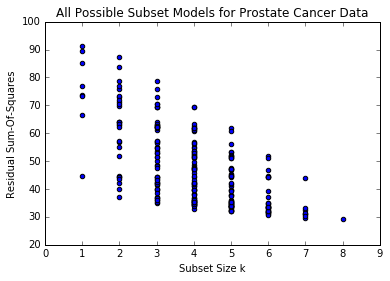

In [13]:
# set x values according to the key and corresponding length of its dictionary
x = [j for j in range(1,9) for k in range(len(rss_values[j]))]

# set y values to k subsets(1-8)
y = []
for k in rss_values.keys():
    y += rss_values[k]

# graph scatter plot
plt.scatter(x,y)
plt.title("All Possible Subset Models for Prostate Cancer Data")
plt.xlabel("Subset Size k")
plt.ylabel("Residual Sum-Of-Squares")

## Part B: Digits Data Model

In [14]:
# Load the data set
digits = datasets.load_digits()

# Training data set
X_digits = digits.data

# Target data set 
y_digits = digits.target

# Allocate 2/3 of the data set as training & 1/3 as testing
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33)

# Print size of data subsets to verify splitting
print("Digits data set: {}".format(digits.data.shape))
print("X_train data set: {}".format(X_train.shape))
print("y_train target array: {}".format(y_train.shape))
print("X_test data set: {}".format(X_test.shape))
print("y_test target array: {}".format(y_test.shape))

Digits data set: (1797, 64)
X_train data set: (1203, 64)
y_train target array: (1203,)
X_test data set: (594, 64)
y_test target array: (594,)


In [15]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Fit the linear model to the training data set
regr.fit(X_train, y_train)

# Predict using the test set
y_pred = regr.predict(X_test)

print(regr.coef_)

[ -1.94280340e-15  -2.89979657e-02   1.24287230e-03  -1.06973050e-02
   4.38643781e-02  -1.65447148e-02  -2.00096106e-02   2.34955480e-02
   8.74096945e-01  -3.12712915e-02   9.63255032e-02   4.05234971e-02
  -5.95940201e-02  -6.59114040e-02   1.05233510e-01   1.68547641e-01
   6.10949342e-02   1.89737977e-02   7.85374735e-02  -4.80103630e-02
  -7.47479284e-02   3.95504178e-02  -5.61130058e-02  -3.46495044e-01
  -3.63275601e+00  -1.58983369e-01   4.02572888e-02   9.12299099e-02
   9.10485724e-02   7.73169368e-02  -1.57133999e-04  -1.32269712e+00
   1.97966643e-14  -1.56139892e-01  -1.17031752e-02   1.32457386e-01
  -5.83320267e-02   4.98255222e-02  -1.70400013e-02   1.70002901e-14
   7.61362376e-02   9.69295065e-02  -2.49461828e-02   7.47353688e-03
   1.30010714e-01   3.40584188e-02   3.67188004e-02  -1.55143391e-02
   8.18111982e-01   4.46771349e-02  -8.21372475e-03  -7.25152141e-02
  -2.08298482e-01  -1.86824314e-02   7.50105484e-02  -8.94214173e-02
  -2.20255711e+00  -4.52896702e-02

In [16]:
# Residual sum of squares
np.sum((regr.predict(X_test) - y_test)**2)

2094.8172659088614

In [17]:
# Explained variance score: 1 is a perfect prediction & 0 is no linear relationship between X and y
reg_score = regr.score(X_test, y_test)
reg_score

0.55782504133663546